In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os

2023-12-25 13:26:25.899870: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-25 13:26:26.735342: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def checkfilepath(filepath):
    return os.path.exists(filepath)

def read_nifti_file(filepath):
    scan = nib.load(filepath)
    data = scan.get_fdata()
    return data

def normalize(volume):
    dmin = np.amin(volume)
    dmax = np.amax(volume)
    davg = np.average(volume)
    volume = (volume-dmin)/davg
    return volume

def process_scan(path):
    vol = read_nifti_file(path)
    vol = normalize(vol)
    return vol


In [3]:
df = pd.read_excel('/lfs1/ashaji/Imputation_Problem/data/ADNI_final.xlsx', engine='openpyxl')
df['SubjID'].replace('',np.nan,inplace=True)
df['AGE_at_scan'].replace('',np.nan,inplace=True)
df.dropna(subset=['SubjID','AGE_at_scan'], inplace=True)
df = df.reset_index(drop=True)
df.loc[df['SEX']=='M','SEX'] = 1
df.loc[df['SEX']=='F','SEX'] = 0
condCN = df['DX'] == 'CN'
df = df.sort_values(by = ['SubjID'])
df = df.loc[condCN,:]
# df = df.sample(frac = 1)
df = df.reset_index(drop=True)

In [4]:
df['SEX'].replace('',np.nan,inplace=True)
df['CDRSB'].replace('',np.nan,inplace=True)
df['ADAS11'].replace('',np.nan,inplace=True)
df['ADAS13'].replace('',np.nan,inplace=True)
df['MMSE'].replace('',np.nan,inplace=True)
df['MOCA'].replace('',np.nan,inplace=True)
df['APOE A1'].replace('',np.nan,inplace=True)
df['APOE A2'].replace('',np.nan,inplace=True)
# df.dropna(subset=['SEX','CDRSB','ADAS11','ADAS13','MMSE','MOCA','APOE A1','APOE A2'], inplace=True)

In [5]:
cond = [checkfilepath(str(x)) for x in df['ACCEL_DL_6DOF_2MM_T1']]
cond0 = df['ACCEL_Preprocessed for DL?']=='yes'

In [6]:
conddwi = [checkfilepath(str(x)) for x in df['DWI_Matched_File_FA_Path_ENIGMATBSSspace']]

In [7]:
cond2 = df['SEX'].isnull()
cond2 = np.invert(cond2)
cond3 = df['CDRSB'].isnull()
cond3 = np.invert(cond3)
cond4 = df['ADAS11'].isnull()
cond4 = np.invert(cond4)
cond5 = df['ADAS13'].isnull()
cond5 = np.invert(cond5)
cond6 = df['MMSE'].isnull()
cond6 = np.invert(cond6)
cond7 = df['MOCA'].isnull()
cond7 = np.invert(cond7)
cond8 = df['APOE A1'].isnull()
cond8 = np.invert(cond8)
cond9 = df['APOE A2'].isnull()
cond9 = np.invert(cond9)

In [8]:
condt1 = [cond[i] & cond0[i]  for i in range(len(cond))]

In [9]:
condstr = cond2 & cond3 & cond4 & cond5 & cond6 & cond7 & cond8 & cond9

In [10]:
t1dwistr = df.loc[[(condt1[i] and conddwi[i] and condstr[i]) for i in range(len(condt1))]  , :]
len(t1dwistr)

458

In [11]:
t1dwi_str = df.loc[[(condt1[i] and not conddwi[i] and condstr[i]) for i in range(len(condt1))] , :]
len(t1dwi_str)

1255

In [12]:
t1dwi_str_ = df.loc[[(condt1[i] and not conddwi[i] and not condstr[i]) for i in range(len(condt1))] , :]
len(t1dwi_str_)

329

In [13]:
t1_dwi_str = df.loc[[(not condt1[i] and not conddwi[i] and condstr[i]) for i in range(len(condt1))] , :]
len(t1_dwi_str)

107

In [14]:
t1dwistr_ = df.loc[[(condt1[i] and conddwi[i] and not condstr[i]) for i in range(len(condt1))] , :]
len(t1dwistr_)

74

In [15]:
t1_dwistr_ = df.loc[[(not condt1[i] and conddwi[i] and not condstr[i]) for i in range(len(condt1))] , :]
len(t1_dwistr_)

0

In [16]:
t1_dwistr = df.loc[[(not condt1[i] and conddwi[i] and condstr[i]) for i in range(len(condt1))] , :]
len(t1_dwistr)

13

In [17]:
t1dwi_str_ = df.loc[[(condt1[i] and not conddwi[i] and not condstr[i]) for i in range(len(condt1))] , :]
len(t1dwi_str_)

329

In [18]:
df = df.reset_index(drop=True)
df.head(20)

,SubjID,RID,NONACCEL_T1_SCAN_FILENAME,NONACCEL_T1_IMAGEID,NONACCEL_Path to RAW nifti,NONACCEL_Preprocessed for DL?,NONACCEL_DL_6DOF_2MM_T1,NONACCEL_DL_6DOF_2MM_MASK,NONACCEL_DL_6DOF_2MM_GM,NONACCEL_DL_6DOF_2MM_WM,...,DWI_Matched_File_L1_Path_ENIGMATBSSspace,DWI_Matched_File_MD_Path_ENIGMATBSSspace,DWI_Matched_File_RD_Path_ENIGMATBSSspace,T1_Path_ENIGMATBSSspace,DWI_Matched_File_FA_Path_ENIGMATBSSspace_2MM,DWI_Matched_File_L1_Path_ENIGMATBSSspace_2MM,DWI_Matched_File_MD_Path_ENIGMATBSSspace_2MM,DWI_Matched_File_RD_Path_ENIGMATBSSspace_2MM,T1_Path_ENIGMATBSSspace_2MM,DWI Preprocessing Pipeline (old=ADNI2 - new=ADNI3)
0,002_S_0295,295,002_S_0295_20060418_A1_T1_1.5T_nonaccel_Preproc,45108.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,002_S_0295,295,002_S_0295_20061102_A1_T1_1.5T_nonaccel_Preproc,40966.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,002_S_0295,295,002_S_0295_20070525_A1_T1_1.5T_nonaccel_Preproc,64025.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,002_S_0295,295,002_S_0295_20080723_A1_T1_1.5T_nonaccel_Preproc,123685.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002_S_0295,295,002_S_0295_20090522_A1_T1_1.5T_nonaccel_Preproc,150177.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,002_S_0295,295,002_S_0295_20100513_A1_T1_1.5T_nonaccel_Preproc,291869.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,002_S_0295,295,002_S_0295_20110602_A2_T1_3T_nonaccel_Preproc,241350.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,002_S_0295,295,002_S_0295_20120510_A2_T1_3T_nonaccel_Preproc,308078.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,002_S_0413,413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/

In [19]:
import nibabel as nib
from tensorflow import keras
from tensorflow.keras import layers
import random as pyrandom
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing import image_dataset_from_directory

import nibabel as nib
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, accuracy_score, f1_score, precision_score, recall_score, auc, roc_auc_score
from sklearn.utils import class_weight
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "5"

physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

/lfs1/ashaji/condawork/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Num GPUs Available:  1


In [20]:
### Hyperparameter config

init_lr = 1e-4
epochs = 50
early_stop = 100
seed = 53
drop_out = 0.5
weight_decay = 1e-4

batch_size=4
test_batch_size=4

In [21]:
def getCNN(width = 91,height = 109, depth = 91):
    
    def conv_block(inp,filt,name):
        inp = tf.keras.layers.Conv3D(filt,3,strides=1,padding='same')(inp)
        inp = tfa.layers.InstanceNormalization(center=False,scale=False)(inp)
        inp = tf.keras.layers.MaxPooling3D(2,strides=2,padding = 'valid')(inp)
        inp = tf.nn.relu(inp)
        return inp
    
    img0 = tf.keras.Input((91,109,91,1),name='inp0')
    inp0 = conv_block(img0,32,'conv_block1')
    inp0 = conv_block(inp0,64,'conv_block2')
    inp0 = conv_block(inp0,128,'conv_block3')
    inp0 = conv_block(inp0,256,'conv_block4')
    inp0 = conv_block(inp0,256,'conv_block5')
    
    ##LAST LAYER
    
    inp0 = tf.keras.layers.Conv3D(64,1,strides=1,padding='same')(inp0)
    inp0 = tfa.layers.InstanceNormalization(center=False,scale=False)(inp0)
    inp0 = tf.nn.relu(inp0)
    inp0 = tf.keras.layers.AveragePooling3D(2,2,'valid')(inp0)
    
    inp0 = tf.keras.layers.Dropout(rate=0.5,name='drop')(inp0)
        
#     out0 = tf.keras.layers.Conv3D(1,1,strides=1,name='regconv1')(inp0)
    out0 = tf.keras.layers.Flatten(name='flatten1')(inp0)
    
    def ann_block(inp,num,name):
        inp = tf.keras.layers.Dense(num)(inp)
        inp = tfa.layers.InstanceNormalization(center=False,scale=False)(inp)
        inp = tf.nn.relu(inp)
        return inp
    
    ##############
    
    strct = tf.keras.Input((8),name='inp2')
    inp2 = ann_block(strct,32,'ann1')
    out2 = ann_block(inp2,16,'ann2')
    
    #LAST LAYER
    ##############
    
    ###FUSION LAYER
    concout= tf.keras.layers.Concatenate()([out0,out2])
    out4 = tf.keras.layers.Dense(units=32,activation='relu',name='out4')(concout)
    out3 = tf.keras.layers.Dense(units=1,name='age')(out4)    
    
    model = keras.Model([img0,strct],out3,name='3DCNN')
    return model

model = getCNN()
model.summary()
    

2023-12-25 13:27:53.731036: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10534 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:0d:00.0, compute capability: 6.1


Model: "3DCNN"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inp0 (InputLayer)              [(None, 91, 109, 91  0           []                               
                                , 1)]                                                             
                                                                                                  
 conv3d (Conv3D)                (None, 91, 109, 91,  896         ['inp0[0][0]']                   
                                 32)                                                              
                                                                                                  
 instance_normalization (Instan  (None, 91, 109, 91,  0          ['conv3d[0][0]']                 
 ceNormalization)                32)                                                          

                                                                                                  
 average_pooling3d (AveragePool  (None, 1, 1, 1, 64)  0          ['tf.nn.relu_5[0][0]']           
 ing3D)                                                                                           
                                                                                                  
 dense_1 (Dense)                (None, 16)           528         ['tf.nn.relu_6[0][0]']           
                                                                                                  
 drop (Dropout)                 (None, 1, 1, 1, 64)  0           ['average_pooling3d[0][0]']      
                                                                                                  
 instance_normalization_7 (Inst  (None, 16)          0           ['dense_1[0][0]']                
 anceNormalization)                                                                               
          

In [22]:
t1str = df.loc[[(condt1[i] and condstr[i]) for i in range(len(condt1))]  , :]

In [31]:
len(t1str)

1713

In [23]:
train = t1str.drop(t1dwistr.index)

In [24]:
len(train)

1255

In [25]:
p = (np.ceil(0.7*len(t1dwistr))-1).astype(int)
q = (np.ceil(0.9*len(t1dwistr))-2).astype(int)
r = len(t1dwistr)
trainn = p
valn  = r - q
testn   = q - p
trainn, testn, valn
trainall = t1dwistr[:p]
testall  = t1dwistr[p:q]
valall   = t1dwistr[q:]
len(trainall), len(testall), len(valall)

(320, 91, 47)

In [29]:
datamix = [train,trainall,valall]
alltrain = pd.concat(datamix)
alltrain = alltrain.sort_values(by = ['SubjID'])

In [30]:
len(alltrain)+len(testall)

1713

In [34]:
count = 0
arr = []
for i in alltrain['SubjID'].drop_duplicates():
    for j in testall['SubjID'].drop_duplicates():
        if i == j:
            arr.append(i)
            count += 1
count

0

In [33]:
for i in arr:
    alltrain.drop(alltrain[(alltrain['SubjID']==i) ].index,inplace = True)

In [35]:
len(alltrain)

1516

In [36]:
p = (np.ceil(0.9*len(alltrain))-1).astype(int)
q = len(alltrain)
trainn = p
# valn  = r - q
valn   = q - p
trainn, valn, trainn + valn

(1364, 152, 1516)

In [42]:
p = p + 1
trainds = alltrain[:p]
valds   = alltrain[p:]
len(trainds),len(valds)

(1367, 149)

In [44]:
for i in trainds['SubjID']:
    for j in testall['SubjID']:
        if i==j:
            print(i)

In [55]:
len(trainds),len(valds),len(testall)

(1367, 149, 91)

In [46]:
def checkTestAll(testall = testall):
    file = open('/lfs1/ashaji/Imputation_Problem/organized/DST/tester.txt','r')
    x = ''
    for i in testall['SubjID']:
        x += str(i+'\n')
    print(x==file.read())
checkTestAll()

True


In [60]:
testCount = 0
testArr = []
for i in testall['SubjID'].drop_duplicates():
    testArr.append(i)
    testCount += 1
testCount

82

/tmp/ipykernel_8831/1918704807.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=trainds.AGE_at_scan, hist=False)
/tmp/ipykernel_8831/1918704807.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=testall.AGE_at_scan, hist=False)


<Axes: xlabel='AGE_at_scan', ylabel='Density'>

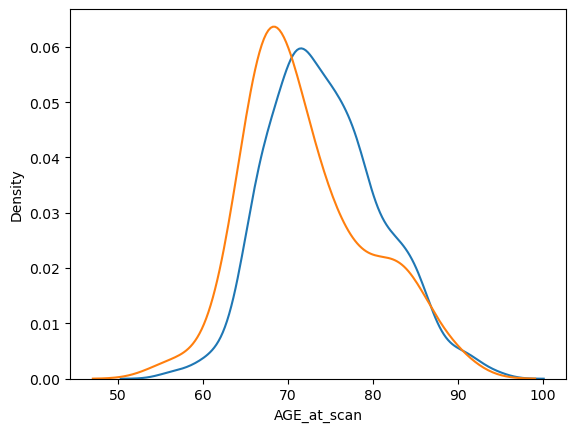

In [38]:
import seaborn as sns
sns.distplot(a=trainds.AGE_at_scan, hist=False)
sns.distplot(a=testall.AGE_at_scan, hist=False)

In [48]:
class DataGenerator(tf.keras.utils.Sequence):
    def rotate(self,vol):
        def scipy_rotate(vol):
            angles = [-20,-10,-5,0,5,10,20]
            angle = pyrandom.choice(angles)
            vol = ndimage.rotate(vol,angle,reshape=False)
            vol[vol<0] = 0
            vol[vol>1] = 1
            return vol
        aug_vol = tf.numpy_function(scipy_rotate,[vol],tf.float32)
        return aug_vol

    def preprocessing(self,vol):
        if(self.isTrain):
            vol1 = self.rotate(vol)
            vol1 = tf.expand_dims(vol1,axis=3)
        else:
            vol1 = tf.expand_dims(vol,axis=3)
        return vol1
    
    def read_scan(self,path):
        scan = nib.load(path)
        volume = scan.get_fdata()
        min = np.amax(volume)
        max = np.amin(volume)
        volume = (volume - min) / (max - min)
        volume = volume.astype("float32")
        return volume

    def __init__(self, data, batch_size, sample_weights=None,isTrain=True):
        self.data = data
        self.batch_size = batch_size
        self.sample_weights = sample_weights
        self.isTrain = isTrain

    def __len__(self):
        return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)

    def __getitem__(self, idx):
        ann = self.data[['SEX','CDRSB','ADAS11','ADAS13','MMSE','MOCA','APOE A1','APOE A2']].values.tolist()
        t1 = self.data['ACCEL_DL_6DOF_2MM_T1'].tolist()
        labels = self.data['AGE_at_scan'].astype(np.float32)
        
        batch_t1 = t1[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_ann = ann[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_y = labels[idx * self.batch_size: (idx + 1) * self.batch_size]
        
        t1_imgs = np.asarray([self.preprocessing(self.read_scan(path)) for path in batch_t1])
        ann_inp = np.asarray(batch_ann)
        return ([t1_imgs,ann_inp], np.array(batch_y))
    
    def on_epoch_end(self):
        if(self.isTrain):
            self.data = self.data.sample(frac=1)

In [49]:
dg_testall = DataGenerator(testall,4,isTrain=False)

In [50]:
dg_train = DataGenerator(trainds,4)
dg_val = DataGenerator(valds,4,isTrain=False)

In [51]:
model.compile(
    loss='mse',
    optimizer = keras.optimizers.AdamW(learning_rate=1e-3,weight_decay=1e-4),
    metrics = [tf.keras.metrics.RootMeanSquaredError(name='rmse'),tf.keras.metrics.MeanAbsoluteError(name='mae')]   
)
early = keras.callbacks.EarlyStopping(monitor='val_loss',patience = 10, verbose = 1, restore_best_weights = True)
history = model.fit(
    dg_train,
    validation_data = dg_val,
    epochs = 200,
    verbose = 1,
    callbacks = [early]
)
model.save('/lfs1/ashaji/Imputation_Problem/EMBC/T1andSTR/modelT1andSTR')

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


Epoch 1/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)
2023-12-25 14:20:39.355868: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-12-25 14:20:43.630945: I tensorflow/compiler/xla/stream_execut

341/341 [==============================] - ETA: 0s - loss: 1724.6123 - rmse: 41.5285 - mae: 33.6381

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)
/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addition

341/341 [==============================] - 284s 804ms/step - loss: 1724.6123 - rmse: 41.5285 - mae: 33.6381 - val_loss: 39.7430 - val_rmse: 6.3042 - val_mae: 5.3362
Epoch 2/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 160.4209 - rmse: 12.6657 - mae: 9.9863

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 271s 794ms/step - loss: 160.4209 - rmse: 12.6657 - mae: 9.9863 - val_loss: 40.4592 - val_rmse: 6.3608 - val_mae: 5.3626
Epoch 3/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 140.0585 - rmse: 11.8346 - mae: 9.4354

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 270s 792ms/step - loss: 140.0585 - rmse: 11.8346 - mae: 9.4354 - val_loss: 49.4517 - val_rmse: 7.0322 - val_mae: 5.7310
Epoch 4/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 133.2251 - rmse: 11.5423 - mae: 9.1986

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 272s 796ms/step - loss: 133.2251 - rmse: 11.5423 - mae: 9.1986 - val_loss: 47.9613 - val_rmse: 6.9254 - val_mae: 5.6653
Epoch 5/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 131.4229 - rmse: 11.4640 - mae: 9.1517

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 270s 791ms/step - loss: 131.4229 - rmse: 11.4640 - mae: 9.1517 - val_loss: 49.8248 - val_rmse: 7.0587 - val_mae: 5.7435
Epoch 6/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 133.3209 - rmse: 11.5465 - mae: 9.2148

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 265s 776ms/step - loss: 133.3209 - rmse: 11.5465 - mae: 9.2148 - val_loss: 48.6682 - val_rmse: 6.9763 - val_mae: 5.6915
Epoch 7/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 117.5205 - rmse: 10.8407 - mae: 8.6844

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 268s 786ms/step - loss: 117.5205 - rmse: 10.8407 - mae: 8.6844 - val_loss: 40.4071 - val_rmse: 6.3567 - val_mae: 5.2830
Epoch 8/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 118.8348 - rmse: 10.9011 - mae: 8.7128

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 268s 786ms/step - loss: 118.8348 - rmse: 10.9011 - mae: 8.7128 - val_loss: 36.6614 - val_rmse: 6.0549 - val_mae: 5.1242
Epoch 9/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 120.0775 - rmse: 10.9580 - mae: 8.7328

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 265s 777ms/step - loss: 120.0775 - rmse: 10.9580 - mae: 8.7328 - val_loss: 33.0012 - val_rmse: 5.7447 - val_mae: 4.8518
Epoch 10/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 117.1996 - rmse: 10.8259 - mae: 8.6466

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 265s 775ms/step - loss: 117.1996 - rmse: 10.8259 - mae: 8.6466 - val_loss: 28.9824 - val_rmse: 5.3835 - val_mae: 4.3892
Epoch 11/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 110.5900 - rmse: 10.5162 - mae: 8.4628

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 267s 782ms/step - loss: 110.5900 - rmse: 10.5162 - mae: 8.4628 - val_loss: 46.6178 - val_rmse: 6.8277 - val_mae: 5.5963
Epoch 12/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 100.5205 - rmse: 10.0260 - mae: 8.0247

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 257s 754ms/step - loss: 100.5205 - rmse: 10.0260 - mae: 8.0247 - val_loss: 26.4393 - val_rmse: 5.1419 - val_mae: 4.0990
Epoch 13/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 112.9816 - rmse: 10.6293 - mae: 8.4403

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 264s 772ms/step - loss: 112.9816 - rmse: 10.6293 - mae: 8.4403 - val_loss: 29.2279 - val_rmse: 5.4063 - val_mae: 4.3221
Epoch 14/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 98.5193 - rmse: 9.9257 - mae: 7.8801

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 265s 778ms/step - loss: 98.5193 - rmse: 9.9257 - mae: 7.8801 - val_loss: 21.2000 - val_rmse: 4.6043 - val_mae: 3.7333
Epoch 15/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 99.0231 - rmse: 9.9510 - mae: 7.8391

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 266s 781ms/step - loss: 99.0231 - rmse: 9.9510 - mae: 7.8391 - val_loss: 26.5544 - val_rmse: 5.1531 - val_mae: 4.1703
Epoch 16/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 96.2119 - rmse: 9.8088 - mae: 7.8129

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 266s 779ms/step - loss: 96.2119 - rmse: 9.8088 - mae: 7.8129 - val_loss: 19.9366 - val_rmse: 4.4650 - val_mae: 3.6951
Epoch 17/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 88.7615 - rmse: 9.4213 - mae: 7.5114

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 263s 770ms/step - loss: 88.7615 - rmse: 9.4213 - mae: 7.5114 - val_loss: 21.3866 - val_rmse: 4.6246 - val_mae: 3.8611
Epoch 18/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 91.5002 - rmse: 9.5656 - mae: 7.7028

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 263s 770ms/step - loss: 91.5002 - rmse: 9.5656 - mae: 7.7028 - val_loss: 29.9553 - val_rmse: 5.4731 - val_mae: 4.6219
Epoch 19/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 83.8815 - rmse: 9.1587 - mae: 7.3420

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 263s 769ms/step - loss: 83.8815 - rmse: 9.1587 - mae: 7.3420 - val_loss: 20.4064 - val_rmse: 4.5173 - val_mae: 3.5292
Epoch 20/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 79.6566 - rmse: 8.9251 - mae: 7.0942

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 267s 782ms/step - loss: 79.6566 - rmse: 8.9251 - mae: 7.0942 - val_loss: 15.2530 - val_rmse: 3.9055 - val_mae: 3.1471
Epoch 21/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 84.0455 - rmse: 9.1676 - mae: 7.3739

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 262s 768ms/step - loss: 84.0455 - rmse: 9.1676 - mae: 7.3739 - val_loss: 16.3005 - val_rmse: 4.0374 - val_mae: 3.2351
Epoch 22/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 77.6635 - rmse: 8.8127 - mae: 7.0906

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 264s 774ms/step - loss: 77.6635 - rmse: 8.8127 - mae: 7.0906 - val_loss: 16.8355 - val_rmse: 4.1031 - val_mae: 3.3355
Epoch 23/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 71.2454 - rmse: 8.4407 - mae: 6.7255

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 262s 769ms/step - loss: 71.2454 - rmse: 8.4407 - mae: 6.7255 - val_loss: 25.3170 - val_rmse: 5.0316 - val_mae: 3.8957
Epoch 25/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 70.4039 - rmse: 8.3907 - mae: 6.6302

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 260s 761ms/step - loss: 70.4039 - rmse: 8.3907 - mae: 6.6302 - val_loss: 19.1745 - val_rmse: 4.3789 - val_mae: 3.5030
Epoch 26/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 68.8131 - rmse: 8.2954 - mae: 6.5999

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 267s 782ms/step - loss: 68.8131 - rmse: 8.2954 - mae: 6.5999 - val_loss: 21.2485 - val_rmse: 4.6096 - val_mae: 3.6254
Epoch 27/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 63.8822 - rmse: 7.9926 - mae: 6.4088

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 265s 778ms/step - loss: 63.8822 - rmse: 7.9926 - mae: 6.4088 - val_loss: 15.3280 - val_rmse: 3.9151 - val_mae: 3.1306
Epoch 28/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 68.8924 - rmse: 8.3001 - mae: 6.5917

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 269s 787ms/step - loss: 68.8924 - rmse: 8.3001 - mae: 6.5917 - val_loss: 47.8080 - val_rmse: 6.9143 - val_mae: 5.9258
Epoch 29/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 60.6371 - rmse: 7.7870 - mae: 6.1660

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - 270s 792ms/step - loss: 60.6371 - rmse: 7.7870 - mae: 6.1660 - val_loss: 15.3609 - val_rmse: 3.9193 - val_mae: 3.0700
Epoch 30/200


/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


341/341 [==============================] - ETA: 0s - loss: 62.8765 - rmse: 7.9295 - mae: 6.2891

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


Restoring model weights from the end of the best epoch: 20.
341/341 [==============================] - 267s 782ms/step - loss: 62.8765 - rmse: 7.9295 - mae: 6.2891 - val_loss: 19.0591 - val_rmse: 4.3657 - val_mae: 3.4649
Epoch 30: early stopping


2023-12-25 16:33:54.135126: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-12-25 16:33:55.198024: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/EMBC/T1andSTR/modelT1andSTR/assets


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/EMBC/T1andSTR/modelT1andSTR/assets


In [52]:
model = keras.models.load_model('/lfs1/ashaji/Imputation_Problem/EMBC/T1andSTR/modelT1andSTR')

In [53]:
model.evaluate(dg_testall)

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)
2023-12-26 15:02:28.727869: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


22/22 [==============================] - 6s 226ms/step - loss: 37.5531 - rmse: 6.1281 - mae: 5.0673


[37.5530891418457, 6.128057479858398, 5.067314624786377]

In [56]:
t1str_ = df.loc[[(condt1[i] and not condstr[i]) for i in range(len(condt1))] , :]

In [46]:
len(t1str_)

403

In [58]:
avg = [t1str_,trainds]
avgCN = pd.concat(avg)
avgCN = avgCN.sort_values(by = ['SubjID'])

In [71]:
len(avgCN)

1723

In [70]:
count = 0
arr = []
for i in avgCN['SubjID'].drop_duplicates():
    for j in valds['SubjID'].drop_duplicates():
        if i == j:
#             print(i)
            arr.append(i)
            count +=1
count

0

In [69]:
for i in arr:
    avgCN.drop(avgCN[(avgCN['SubjID']==i) ].index,inplace = True)

In [63]:
count = 0
arr = []
for i in avgCN['SubjID'].drop_duplicates():
    for j in alltrain[p:]['SubjID'].drop_duplicates():
        if i == j:
#             print(i)
            arr.append(i)
            count +=1
count

0

In [93]:
len(avgCN)

1723

In [ ]:
############# IMPUTATION TECHNIQUE 0 ##################

In [73]:
def read_scan(path):
        scan = nib.load(path)
        volume = scan.get_fdata()
        return volume
def normalize(vol):
    min = np.amax(vol)
    max = np.amin(vol)
    vol = (vol-min) / (max-min)
    vol = vol.astype('float32')
    return vol

avgMRI = np.zeros((91,109,91))

for i in avgCN['ACCEL_DL_6DOF_2MM_T1']:
    avgMRI += read_scan(i)
    
avgMRI = normalize(avgMRI)

In [74]:
class DataGeneratorImpT1(tf.keras.utils.Sequence):
    def rotate(self,vol):
        def scipy_rotate(vol):
            angles = [-20,-10,-5,0,5,10,20]
            angle = pyrandom.choice(angles)
            vol = ndimage.rotate(vol,angle,reshape=False)
            vol[vol<0] = 0
            vol[vol>1] = 1
            return vol
        aug_vol = tf.numpy_function(scipy_rotate,[vol],tf.float32)
        return aug_vol

    def preprocessing(self,vol):
        vol1 = self.rotate(vol)
        vol1 = tf.expand_dims(vol1,axis=3)
        return vol1
    
    def read_scan(self,path):
        scan = nib.load(path)
        volume = scan.get_fdata()
        min = np.amax(volume)
        max = np.amin(volume)
        volume = (volume - min) / (max - min)
        volume = volume.astype("float32")
        return volume
    
    def __len__(self):
        return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)

    def __init__(self,data, batch_size, sample_weights=None):
        self.data = data
        self.batch_size = batch_size
        self.sample_weights = sample_weights

    def __getitem__(self, idx):
        
        ann = self.data[['SEX','CDRSB','ADAS11','ADAS13','MMSE','MOCA','APOE A1','APOE A2']].values.tolist()
        t1 = self.data['ACCEL_DL_6DOF_2MM_T1'].tolist()
        labels = self.data['AGE_at_scan'].astype(np.float32)
        
        batch_t1 = t1[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_ann = ann[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_y = labels[idx * self.batch_size: (idx + 1) * self.batch_size]
        ###########
        t1 = []
        for i in batch_t1:
            if pd.isnull(i):
                t1.append(avgMRI)
            else:
                t1.append((self.read_scan(i)))
        t1_imgs = np.asarray([self.preprocessing(img) for img in t1])
        ann_inp = np.asarray(batch_ann)
        
        return ([t1_imgs,ann_inp], np.array(batch_y))
    
    def on_epoch_end(self):
        self.data = self.data.sample(frac=1)

In [75]:
t1_str = df.loc[[(not condt1[i] and condstr[i]) for i in range(len(condt1))] , :]
train1 = [t1_str,trainds]
train1 = pd.concat(train1)

In [76]:
len(train1)

1487

In [88]:
count = 0
arr = []
for i in train1['SubjID'].drop_duplicates():
    for j in testall['SubjID'].drop_duplicates():
        if i == j:
#             print(i)
            arr.append(i)
            count +=1
count

0

In [85]:
for i in arr:
    train1.drop(train1[(train1['SubjID']==i) ].index,inplace = True)

In [89]:
dg1_train = DataGeneratorImpT1(train1,batch_size)

In [90]:
model = keras.models.load_model('/lfs1/ashaji/Imputation_Problem/EMBC/T1andSTR/modelT1andSTR')
early = keras.callbacks.EarlyStopping(monitor='val_loss',patience = 20, verbose = 1, restore_best_weights = True)
history = model.fit(
    dg1_train,
    validation_data = dg_val,
    epochs = 200,
    verbose = 1,
    callbacks = [early]
)
model.save('/lfs1/ashaji/Imputation_Problem/EMBC/T1andSTR/T1andSTRavgImp')

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


Epoch 1/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)
2023-12-26 20:29:48.403914: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


368/368 [==============================] - ETA: 0s - loss: 93.2385 - rmse: 9.6560 - mae: 7.7429

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)
/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addition

368/368 [==============================] - 301s 804ms/step - loss: 93.2385 - rmse: 9.6560 - mae: 7.7429 - val_loss: 22.9994 - val_rmse: 4.7958 - val_mae: 3.7647
Epoch 2/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 85.9540 - rmse: 9.2711 - mae: 7.2915

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 285s 772ms/step - loss: 85.9540 - rmse: 9.2711 - mae: 7.2915 - val_loss: 21.8282 - val_rmse: 4.6721 - val_mae: 3.5784
Epoch 3/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 83.5846 - rmse: 9.1425 - mae: 7.3261

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 283s 768ms/step - loss: 83.5846 - rmse: 9.1425 - mae: 7.3261 - val_loss: 19.6826 - val_rmse: 4.4365 - val_mae: 3.5756
Epoch 4/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 76.6239 - rmse: 8.7535 - mae: 6.9168

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 284s 772ms/step - loss: 76.6239 - rmse: 8.7535 - mae: 6.9168 - val_loss: 18.2157 - val_rmse: 4.2680 - val_mae: 3.4525
Epoch 5/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 79.9351 - rmse: 8.9406 - mae: 7.1124

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 287s 780ms/step - loss: 79.9351 - rmse: 8.9406 - mae: 7.1124 - val_loss: 16.2160 - val_rmse: 4.0269 - val_mae: 3.1131
Epoch 6/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 71.3202 - rmse: 8.4451 - mae: 6.7621

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 288s 782ms/step - loss: 71.3202 - rmse: 8.4451 - mae: 6.7621 - val_loss: 15.2951 - val_rmse: 3.9109 - val_mae: 3.0803
Epoch 7/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 70.8059 - rmse: 8.4146 - mae: 6.7672

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 287s 779ms/step - loss: 70.8059 - rmse: 8.4146 - mae: 6.7672 - val_loss: 19.9929 - val_rmse: 4.4713 - val_mae: 3.4529
Epoch 8/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 64.6002 - rmse: 8.0374 - mae: 6.4198

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 287s 780ms/step - loss: 64.6002 - rmse: 8.0374 - mae: 6.4198 - val_loss: 15.9426 - val_rmse: 3.9928 - val_mae: 3.1376
Epoch 9/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 61.2461 - rmse: 7.8260 - mae: 6.2943

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 291s 791ms/step - loss: 61.2461 - rmse: 7.8260 - mae: 6.2943 - val_loss: 17.1506 - val_rmse: 4.1413 - val_mae: 3.1768
Epoch 10/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 58.4251 - rmse: 7.6436 - mae: 6.0900

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 283s 768ms/step - loss: 58.4251 - rmse: 7.6436 - mae: 6.0900 - val_loss: 14.5199 - val_rmse: 3.8105 - val_mae: 2.9373
Epoch 11/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 62.1754 - rmse: 7.8851 - mae: 6.1485

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 286s 777ms/step - loss: 62.1754 - rmse: 7.8851 - mae: 6.1485 - val_loss: 20.8415 - val_rmse: 4.5652 - val_mae: 3.5588
Epoch 12/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 58.6108 - rmse: 7.6558 - mae: 6.0389

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 289s 784ms/step - loss: 58.6108 - rmse: 7.6558 - mae: 6.0389 - val_loss: 19.4824 - val_rmse: 4.4139 - val_mae: 3.5704
Epoch 13/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 53.0493 - rmse: 7.2835 - mae: 5.7179

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 288s 782ms/step - loss: 53.0493 - rmse: 7.2835 - mae: 5.7179 - val_loss: 18.4426 - val_rmse: 4.2945 - val_mae: 3.4125
Epoch 14/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 50.6432 - rmse: 7.1164 - mae: 5.7179

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 288s 782ms/step - loss: 50.6432 - rmse: 7.1164 - mae: 5.7179 - val_loss: 15.6133 - val_rmse: 3.9514 - val_mae: 3.0969
Epoch 15/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 44.5515 - rmse: 6.6747 - mae: 5.2710

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 280s 761ms/step - loss: 44.5515 - rmse: 6.6747 - mae: 5.2710 - val_loss: 21.3800 - val_rmse: 4.6239 - val_mae: 3.7909
Epoch 16/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 44.2625 - rmse: 6.6530 - mae: 5.2566

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 291s 791ms/step - loss: 44.2625 - rmse: 6.6530 - mae: 5.2566 - val_loss: 22.9143 - val_rmse: 4.7869 - val_mae: 3.8022
Epoch 17/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 43.2079 - rmse: 6.5733 - mae: 5.1255

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 281s 762ms/step - loss: 43.2079 - rmse: 6.5733 - mae: 5.1255 - val_loss: 18.2399 - val_rmse: 4.2708 - val_mae: 3.4348
Epoch 18/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 37.9537 - rmse: 6.1607 - mae: 4.7987

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 286s 777ms/step - loss: 37.9537 - rmse: 6.1607 - mae: 4.7987 - val_loss: 28.2640 - val_rmse: 5.3164 - val_mae: 4.4286
Epoch 19/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 37.5420 - rmse: 6.1272 - mae: 4.7079

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 291s 789ms/step - loss: 37.5420 - rmse: 6.1272 - mae: 4.7079 - val_loss: 27.2290 - val_rmse: 5.2181 - val_mae: 4.4684
Epoch 20/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 32.4350 - rmse: 5.6952 - mae: 4.4541

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 289s 785ms/step - loss: 32.4350 - rmse: 5.6952 - mae: 4.4541 - val_loss: 15.9299 - val_rmse: 3.9912 - val_mae: 3.1820
Epoch 21/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 31.6141 - rmse: 5.6226 - mae: 4.4170

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 290s 787ms/step - loss: 31.6141 - rmse: 5.6226 - mae: 4.4170 - val_loss: 18.4250 - val_rmse: 4.2924 - val_mae: 3.4785
Epoch 22/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 29.4033 - rmse: 5.4225 - mae: 4.2597

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 275s 748ms/step - loss: 29.4033 - rmse: 5.4225 - mae: 4.2597 - val_loss: 21.1245 - val_rmse: 4.5961 - val_mae: 3.6943
Epoch 23/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 27.2960 - rmse: 5.2246 - mae: 4.0330

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 288s 782ms/step - loss: 27.2960 - rmse: 5.2246 - mae: 4.0330 - val_loss: 18.5507 - val_rmse: 4.3070 - val_mae: 3.5089
Epoch 24/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 24.8307 - rmse: 4.9830 - mae: 3.8693

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 285s 775ms/step - loss: 24.8307 - rmse: 4.9830 - mae: 3.8693 - val_loss: 17.1290 - val_rmse: 4.1387 - val_mae: 3.3496
Epoch 25/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 22.8644 - rmse: 4.7817 - mae: 3.7020

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 284s 771ms/step - loss: 22.8644 - rmse: 4.7817 - mae: 3.7020 - val_loss: 20.6498 - val_rmse: 4.5442 - val_mae: 3.6458
Epoch 26/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 23.1047 - rmse: 4.8067 - mae: 3.7014

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 292s 793ms/step - loss: 23.1047 - rmse: 4.8067 - mae: 3.7014 - val_loss: 24.2797 - val_rmse: 4.9274 - val_mae: 3.9274
Epoch 27/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 23.2702 - rmse: 4.8239 - mae: 3.7180

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 287s 780ms/step - loss: 23.2702 - rmse: 4.8239 - mae: 3.7180 - val_loss: 16.6926 - val_rmse: 4.0857 - val_mae: 3.2800
Epoch 28/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 18.6540 - rmse: 4.3190 - mae: 3.3012

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 285s 774ms/step - loss: 18.6540 - rmse: 4.3190 - mae: 3.3012 - val_loss: 19.7899 - val_rmse: 4.4486 - val_mae: 3.6247
Epoch 29/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 18.2158 - rmse: 4.2680 - mae: 3.2120

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - 286s 778ms/step - loss: 18.2158 - rmse: 4.2680 - mae: 3.2120 - val_loss: 17.6970 - val_rmse: 4.2068 - val_mae: 3.3248
Epoch 30/200


/tmp/ipykernel_36297/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


368/368 [==============================] - ETA: 0s - loss: 17.3141 - rmse: 4.1610 - mae: 3.1734

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


Restoring model weights from the end of the best epoch: 10.
368/368 [==============================] - 286s 777ms/step - loss: 17.3141 - rmse: 4.1610 - mae: 3.1734 - val_loss: 17.5622 - val_rmse: 4.1907 - val_mae: 3.4593
Epoch 30: early stopping


2023-12-26 22:53:14.308841: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-12-26 22:53:15.324656: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/EMBC/T1andSTR/T1andSTRavgImp/assets


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/EMBC/T1andSTR/T1andSTRavgImp/assets


In [91]:
model = keras.models.load_model('/lfs1/ashaji/Imputation_Problem/EMBC/T1andSTR/T1andSTRavgImp')

In [92]:
model.evaluate(dg_testall)

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)
2023-12-27 13:00:56.233996: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


22/22 [==============================] - 9s 376ms/step - loss: 32.3562 - rmse: 5.6883 - mae: 4.5393


[32.356201171875, 5.68825101852417, 4.539277076721191]

In [130]:
import keras_tuner as kt
def build_model(hp):
    model = tuner.get_best_models(1)[0]
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3,1e-4,1e-5,1e-6])
    model.compile(
        loss='mse',
        optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate),
        metrics = [tf.keras.metrics.RootMeanSquaredError(name='rmse'),tf.keras.metrics.MeanAbsoluteError(name='mae')]   
    )
    return model

In [131]:
tunerimp0 = kt.RandomSearch(build_model,objective='val_loss',max_trials = 5,executions_per_trial = 1,
                       directory = '/lfs1/ashaji/Imputation_Problem/ISBI/tuner',
                        overwrite=True,
                       project_name = 'T1andSTRImp0')

In [132]:
early = keras.callbacks.EarlyStopping(monitor='val_loss',patience = 7, verbose = 1, restore_best_weights = True)
tunerimp0.search(dg_train,epochs=200,validation_data = dg_val,callbacks=[early])

Trial 4 Complete [00h 40m 56s]
val_loss: 15.418343544006348

Best val_loss So Far: 15.418343544006348
Total elapsed time: 03h 54m 31s


In [134]:
model = tunerimp0.get_best_models(1)[0]
model.save('/lfs1/ashaji/Imputation_Problem/ISBI/train/T1andSTR/Imp0')

2023-10-29 20:59:39.390959: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-10-29 20:59:40.479109: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/ISBI/train/T1andSTR/Imp0/assets


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/ISBI/train/T1andSTR/Imp0/assets


In [137]:
model.evaluate(dg_testall)

/tmp/ipykernel_7455/3911524858.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)
2023-10-29 21:02:57.576894: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


22/22 [==============================] - 18s 810ms/step - loss: 30.2146 - rmse: 5.4968 - mae: 4.5832


[30.214616775512695, 5.496782302856445, 4.583230495452881]

In [103]:
# filepath = '/lfs1/ashaji/Imputation_Problem/further/IMPT1andSTR/modelIMPT1andSTRagain-epoch{epoch:02d}-val_loss{val_loss:.2f}'
# check = keras.callbacks.ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True,mode='auto')
# early = keras.callbacks.EarlyStopping(monitor='val_loss',patience = 10, verbose = 1, restore_best_weights = True)

# history = model.fit(
#     dg1_train,
#     validation_data = dg_val,
#     epochs = 200,
#     verbose = 1,
#     callbacks = [check,early]
# )

/tmp/ipykernel_4425/3911524858.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


Epoch 1/200


/tmp/ipykernel_4425/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)
2023-10-11 22:01:09.318678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


371/371 [==============================] - ETA: 0s - loss: 31.1213 - rmse: 5.5786 - mae: 4.3159

/tmp/ipykernel_4425/3911524858.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)
/tmp/ipykernel_4425/3911524858.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional


Epoch 1: val_loss improved from inf to 30.89062, saving model to /lfs1/ashaji/Imputation_Problem/further/IMPT1andSTR/modelIMPT1andSTRagain-epoch01-val_loss30.89


2023-10-11 22:07:10.137357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-10-11 22:07:11.332287: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/further/IMPT1andSTR/modelIMPT1andSTRagain-epoch01-val_loss30.89/assets


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/further/IMPT1andSTR/modelIMPT1andSTRagain-epoch01-val_loss30.89/assets


371/371 [==============================] - 363s 962ms/step - loss: 31.1213 - rmse: 5.5786 - mae: 4.3159 - val_loss: 30.8906 - val_rmse: 5.5579 - val_mae: 4.4062
Epoch 2/200


/tmp/ipykernel_4425/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 26.0209 - rmse: 5.1011 - mae: 3.9185

/tmp/ipykernel_4425/3911524858.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)



Epoch 2: val_loss improved from 30.89062 to 30.26620, saving model to /lfs1/ashaji/Imputation_Problem/further/IMPT1andSTR/modelIMPT1andSTRagain-epoch02-val_loss30.27


2023-10-11 22:12:57.780918: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-10-11 22:12:58.993112: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/further/IMPT1andSTR/modelIMPT1andSTRagain-epoch02-val_loss30.27/assets


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/further/IMPT1andSTR/modelIMPT1andSTRagain-epoch02-val_loss30.27/assets


371/371 [==============================] - 347s 937ms/step - loss: 26.0209 - rmse: 5.1011 - mae: 3.9185 - val_loss: 30.2662 - val_rmse: 5.5015 - val_mae: 4.4752
Epoch 3/200


/tmp/ipykernel_4425/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 22.7291 - rmse: 4.7675 - mae: 3.6669

/tmp/ipykernel_4425/3911524858.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)



Epoch 3: val_loss improved from 30.26620 to 19.07513, saving model to /lfs1/ashaji/Imputation_Problem/further/IMPT1andSTR/modelIMPT1andSTRagain-epoch03-val_loss19.08


2023-10-11 22:18:45.369813: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-10-11 22:18:46.772999: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/further/IMPT1andSTR/modelIMPT1andSTRagain-epoch03-val_loss19.08/assets


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/further/IMPT1andSTR/modelIMPT1andSTRagain-epoch03-val_loss19.08/assets


371/371 [==============================] - 348s 937ms/step - loss: 22.7291 - rmse: 4.7675 - mae: 3.6669 - val_loss: 19.0751 - val_rmse: 4.3675 - val_mae: 3.4766
Epoch 4/200


/tmp/ipykernel_4425/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 21.3059 - rmse: 4.6158 - mae: 3.5279

/tmp/ipykernel_4425/3911524858.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)



Epoch 4: val_loss did not improve from 19.07513
371/371 [==============================] - 343s 925ms/step - loss: 21.3059 - rmse: 4.6158 - mae: 3.5279 - val_loss: 21.0567 - val_rmse: 4.5888 - val_mae: 3.7454
Epoch 5/200


/tmp/ipykernel_4425/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 19.0647 - rmse: 4.3663 - mae: 3.3308

/tmp/ipykernel_4425/3911524858.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)



Epoch 5: val_loss improved from 19.07513 to 18.99465, saving model to /lfs1/ashaji/Imputation_Problem/further/IMPT1andSTR/modelIMPT1andSTRagain-epoch05-val_loss18.99


2023-10-11 22:30:20.324899: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-10-11 22:30:21.654241: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/further/IMPT1andSTR/modelIMPT1andSTRagain-epoch05-val_loss18.99/assets


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/further/IMPT1andSTR/modelIMPT1andSTRagain-epoch05-val_loss18.99/assets


371/371 [==============================] - 352s 948ms/step - loss: 19.0647 - rmse: 4.3663 - mae: 3.3308 - val_loss: 18.9947 - val_rmse: 4.3583 - val_mae: 3.5180
Epoch 6/200


/tmp/ipykernel_4425/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 20.1966 - rmse: 4.4941 - mae: 3.3792

/tmp/ipykernel_4425/3911524858.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)



Epoch 6: val_loss did not improve from 18.99465
371/371 [==============================] - 341s 919ms/step - loss: 20.1966 - rmse: 4.4941 - mae: 3.3792 - val_loss: 24.4355 - val_rmse: 4.9432 - val_mae: 4.0243


/tmp/ipykernel_4425/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


Epoch 7/200
371/371 [==============================] - ETA: 0s - loss: 18.6784 - rmse: 4.3218 - mae: 3.2681

/tmp/ipykernel_4425/3911524858.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)



Epoch 7: val_loss did not improve from 18.99465
371/371 [==============================] - 345s 930ms/step - loss: 18.6784 - rmse: 4.3218 - mae: 3.2681 - val_loss: 25.2578 - val_rmse: 5.0257 - val_mae: 3.9684
Epoch 8/200


/tmp/ipykernel_4425/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 17.4648 - rmse: 4.1791 - mae: 3.1436

/tmp/ipykernel_4425/3911524858.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)



Epoch 8: val_loss did not improve from 18.99465
371/371 [==============================] - 350s 943ms/step - loss: 17.4648 - rmse: 4.1791 - mae: 3.1436 - val_loss: 20.3487 - val_rmse: 4.5109 - val_mae: 3.7087
Epoch 9/200


/tmp/ipykernel_4425/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 16.8604 - rmse: 4.1061 - mae: 3.0730

/tmp/ipykernel_4425/3911524858.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)



Epoch 9: val_loss did not improve from 18.99465
371/371 [==============================] - 348s 937ms/step - loss: 16.8604 - rmse: 4.1061 - mae: 3.0730 - val_loss: 24.5802 - val_rmse: 4.9578 - val_mae: 3.9632
Epoch 10/200


/tmp/ipykernel_4425/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 16.5440 - rmse: 4.0674 - mae: 3.0483

/tmp/ipykernel_4425/3911524858.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)



Epoch 10: val_loss did not improve from 18.99465
371/371 [==============================] - 346s 933ms/step - loss: 16.5440 - rmse: 4.0674 - mae: 3.0483 - val_loss: 21.3662 - val_rmse: 4.6224 - val_mae: 3.7494
Epoch 11/200


/tmp/ipykernel_4425/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 15.5935 - rmse: 3.9489 - mae: 2.9689

/tmp/ipykernel_4425/3911524858.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)



Epoch 11: val_loss did not improve from 18.99465
371/371 [==============================] - 344s 927ms/step - loss: 15.5935 - rmse: 3.9489 - mae: 2.9689 - val_loss: 20.5311 - val_rmse: 4.5311 - val_mae: 3.6135
Epoch 12/200


/tmp/ipykernel_4425/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 15.6974 - rmse: 3.9620 - mae: 2.9689

/tmp/ipykernel_4425/3911524858.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)



Epoch 12: val_loss did not improve from 18.99465
371/371 [==============================] - 341s 920ms/step - loss: 15.6974 - rmse: 3.9620 - mae: 2.9689 - val_loss: 23.3964 - val_rmse: 4.8370 - val_mae: 3.8797
Epoch 13/200


/tmp/ipykernel_4425/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 15.5518 - rmse: 3.9436 - mae: 2.9579

/tmp/ipykernel_4425/3911524858.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)



Epoch 13: val_loss did not improve from 18.99465
371/371 [==============================] - 341s 920ms/step - loss: 15.5518 - rmse: 3.9436 - mae: 2.9579 - val_loss: 22.3704 - val_rmse: 4.7297 - val_mae: 3.8447
Epoch 14/200


/tmp/ipykernel_4425/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 14.7132 - rmse: 3.8358 - mae: 2.8425

/tmp/ipykernel_4425/3911524858.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)



Epoch 14: val_loss did not improve from 18.99465
371/371 [==============================] - 340s 916ms/step - loss: 14.7132 - rmse: 3.8358 - mae: 2.8425 - val_loss: 20.0315 - val_rmse: 4.4757 - val_mae: 3.5439
Epoch 15/200


/tmp/ipykernel_4425/3882607055.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 13.1243 - rmse: 3.6228 - mae: 2.6140

/tmp/ipykernel_4425/3911524858.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)



Epoch 15: val_loss did not improve from 18.99465
Restoring model weights from the end of the best epoch: 5.
371/371 [==============================] - 345s 930ms/step - loss: 13.1243 - rmse: 3.6228 - mae: 2.6140 - val_loss: 21.3918 - val_rmse: 4.6251 - val_mae: 3.6492
Epoch 15: early stopping


In [115]:
# model = keras.models.load_model('/lfs1/ashaji/Imputation_Problem/further/IMPT1andSTR/modelIMPT1andSTRagain-epoch05-val_loss18.99')

In [116]:
# model.evaluate(dg_testall)

/tmp/ipykernel_4425/3911524858.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)
2023-10-12 06:17:52.917285: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


22/22 [==============================] - 19s 836ms/step - loss: 29.4039 - rmse: 5.4225 - mae: 4.2278


[29.40391731262207, 5.422537803649902, 4.227817535400391]

In [73]:
### IMPUTATION 2

In [95]:
def read_scan(path):
        scan = nib.load(str(path))
        volume = scan.get_fdata()
        return volume
def normalize(vol):
    min = np.amax(vol)
    max = np.amin(vol)
    if max == 0 and min == 0:
        return vol
    vol = (vol-min) / (max-min)
    vol = vol.astype('float32')
    return vol

def avgMRI(avg):  
    avgMRI = np.zeros((91,109,91))
    if avg.empty:
        return avgMRI
    for i in avg['ACCEL_DL_6DOF_2MM_T1']:
        avgMRI += read_scan(i)
    return normalize(avgMRI)

avg0x = avgCN[(avgCN['AGE_at_scan'] >= 40) & (avgCN['AGE_at_scan'] < 45)]
avg1x = avgCN[(avgCN['AGE_at_scan'] >= 45) & (avgCN['AGE_at_scan'] < 50)]
avg2x = avgCN[(avgCN['AGE_at_scan'] >= 50) & (avgCN['AGE_at_scan'] < 55)]
avg3x = avgCN[(avgCN['AGE_at_scan'] >= 55) & (avgCN['AGE_at_scan'] < 60)]
avg4x = avgCN[(avgCN['AGE_at_scan'] >= 60) & (avgCN['AGE_at_scan'] < 65)]
avg5x = avgCN[(avgCN['AGE_at_scan'] >= 65) & (avgCN['AGE_at_scan'] < 70)]
avg6x = avgCN[(avgCN['AGE_at_scan'] >= 70) & (avgCN['AGE_at_scan'] < 75)]
avg7x = avgCN[(avgCN['AGE_at_scan'] >= 75) & (avgCN['AGE_at_scan'] < 80)]
avg8x = avgCN[(avgCN['AGE_at_scan'] >= 80) & (avgCN['AGE_at_scan'] < 85)]
avg9x = avgCN[(avgCN['AGE_at_scan'] >= 85) & (avgCN['AGE_at_scan'] < 90)]
avg10x = avgCN[(avgCN['AGE_at_scan'] >= 90) & (avgCN['AGE_at_scan'] < 95)]
avg11x = avgCN[(avgCN['AGE_at_scan'] >= 95) & (avgCN['AGE_at_scan'] < 100)]
print(len(avg0x),len(avg1x),len(avg2x),len(avg3x),len(avg4x),len(avg5x),len(avg6x),len(avg7x),len(avg8x),len(avg9x),len(avg10x),len(avg11x))


0 0 0 19 84 392 514 383 217 86 26 2


In [96]:
avg0 = avgMRI(avg0x)
avg1 = avgMRI(avg1x)
avg2 = avgMRI(avg2x)
avg3 = avgMRI(avg3x)
avg4 = avgMRI(avg4x)
avg5 = avgMRI(avg5x)
avg6 = avgMRI(avg6x)
avg7 = avgMRI(avg7x)
avg8 = avgMRI(avg8x)
avg9 = avgMRI(avg9x)
avg10 = avgMRI(avg10x)
avg11 = avgMRI(avg11x)

In [97]:
class DataGeneratorMRIs(tf.keras.utils.Sequence):
    def rotate(self,vol):
        def scipy_rotate(vol):
            angles = [-20,-10,-5,0,5,10,20]
            angle = pyrandom.choice(angles)
            vol = ndimage.rotate(vol,angle,reshape=False)
            vol[vol<0] = 0
            vol[vol>1] = 1
            return vol
        aug_vol = tf.numpy_function(scipy_rotate,[vol],tf.float32)
        return aug_vol

    def preprocessing(self,vol):
        vol1 = self.rotate(vol)
        vol1 = tf.expand_dims(vol1,axis=3)
        return vol1
    
    def returnAvg(self,age):
        if age>=40 and age < 45:
            return avg0
        elif age>=45 and age < 50:
            return avg1
        elif age>=50 and age < 55:
            return avg2
        elif age>=55 and age < 60:
            return avg3
        elif age>=60 and age < 65:
            return avg4
        elif age>=65 and age < 70:
            return avg5
        elif age>=70 and age < 75:
            return avg6
        elif age>=75 and age < 80:
            return avg7
        elif age>=80 and age < 85:
            return avg8
        elif age>=85 and age < 90:
            return avg9
        elif age>=90 and age < 95:
            return avg10
        elif age>=95 and age < 100:
            return avg11
        
    
    def read_scan(self,path):
        scan = nib.load(path)
        volume = scan.get_fdata()
        min = np.amax(volume)
        max = np.amin(volume)
        volume = (volume - min) / (max - min)
        volume = volume.astype("float32")
        return volume

    def __init__(self,data, batch_size, sample_weights=None):
        self.data=data
        self.batch_size = batch_size
        self.sample_weights = sample_weights

    def __len__(self):
        return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)

    def __getitem__(self, idx):
        
        ann = self.data[['SEX','CDRSB','ADAS11','ADAS13','MMSE','MOCA','APOE A1','APOE A2']].values.tolist()
        t1 = self.data['ACCEL_DL_6DOF_2MM_T1'].tolist()
        labels = self.data['AGE_at_scan'].astype(np.float32)
        
        batch_t1 = t1[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_ann = ann[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_y = labels[idx * self.batch_size: (idx + 1) * self.batch_size]
        
        ann_inp = np.asarray(batch_ann)
        t1 = []
        for i in range(len(batch_t1)):
            if pd.isnull(batch_t1[i]):
                t1.append(self.returnAvg(batch_y.iloc[i]))
            else:
                t1.append((self.read_scan(batch_t1[i])))
        t1_imgs = np.asarray([self.preprocessing(img) for img in t1])
        return ([t1_imgs,ann_inp], np.array(batch_y))
    
    def on_epoch_end(self):
        self.data = self.data.sample(frac=1)

In [98]:
dg2_train = DataGeneratorMRIs(train1,batch_size)

In [99]:
model = keras.models.load_model('/lfs1/ashaji/Imputation_Problem/EMBC/T1andSTR/modelT1andSTR')
early = keras.callbacks.EarlyStopping(monitor='val_loss',patience = 20, verbose = 1, restore_best_weights = True)

history = model.fit(
    dg2_train,
    validation_data = dg_val,
    epochs = 200,
    verbose = 1,
    callbacks = [early]
)
model.save('/lfs1/ashaji/Imputation_Problem/EMBC/T1andSTR/modelT1andSTRbuckavgimp')

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


Epoch 1/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)
2023-12-27 16:04:29.251400: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


369/369 [==============================] - ETA: 0s - loss: 86.9348 - rmse: 9.3239 - mae: 7.4549

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)
/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addition

369/369 [==============================] - 296s 789ms/step - loss: 86.9348 - rmse: 9.3239 - mae: 7.4549 - val_loss: 18.3076 - val_rmse: 4.2787 - val_mae: 3.5197
Epoch 2/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 85.3171 - rmse: 9.2367 - mae: 7.3532

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 289s 782ms/step - loss: 85.3171 - rmse: 9.2367 - mae: 7.3532 - val_loss: 23.8325 - val_rmse: 4.8819 - val_mae: 3.8382
Epoch 3/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 76.0367 - rmse: 8.7199 - mae: 6.9930

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 288s 779ms/step - loss: 76.0367 - rmse: 8.7199 - mae: 6.9930 - val_loss: 17.3540 - val_rmse: 4.1658 - val_mae: 3.3737
Epoch 4/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 77.8234 - rmse: 8.8218 - mae: 7.0243

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 287s 777ms/step - loss: 77.8234 - rmse: 8.8218 - mae: 7.0243 - val_loss: 22.7271 - val_rmse: 4.7673 - val_mae: 3.6897
Epoch 5/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 74.9072 - rmse: 8.6549 - mae: 6.9348

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 290s 787ms/step - loss: 74.9072 - rmse: 8.6549 - mae: 6.9348 - val_loss: 15.7185 - val_rmse: 3.9647 - val_mae: 3.0552
Epoch 6/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 71.0306 - rmse: 8.4280 - mae: 6.6860

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 285s 770ms/step - loss: 71.0306 - rmse: 8.4280 - mae: 6.6860 - val_loss: 15.0024 - val_rmse: 3.8733 - val_mae: 3.0203
Epoch 7/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 68.7738 - rmse: 8.2930 - mae: 6.5478

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 285s 772ms/step - loss: 68.7738 - rmse: 8.2930 - mae: 6.5478 - val_loss: 16.5657 - val_rmse: 4.0701 - val_mae: 3.2962
Epoch 8/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 63.4449 - rmse: 7.9652 - mae: 6.4107

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 286s 775ms/step - loss: 63.4449 - rmse: 7.9652 - mae: 6.4107 - val_loss: 15.5231 - val_rmse: 3.9399 - val_mae: 3.0455
Epoch 9/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 66.4418 - rmse: 8.1512 - mae: 6.4305

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 284s 770ms/step - loss: 66.4418 - rmse: 8.1512 - mae: 6.4305 - val_loss: 16.0581 - val_rmse: 4.0073 - val_mae: 3.1924
Epoch 10/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 57.2158 - rmse: 7.5641 - mae: 6.0141

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 286s 774ms/step - loss: 57.2158 - rmse: 7.5641 - mae: 6.0141 - val_loss: 15.7836 - val_rmse: 3.9729 - val_mae: 3.1039
Epoch 11/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 57.4541 - rmse: 7.5798 - mae: 5.9788

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 289s 784ms/step - loss: 57.4541 - rmse: 7.5798 - mae: 5.9788 - val_loss: 15.6998 - val_rmse: 3.9623 - val_mae: 3.1363
Epoch 12/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 52.4736 - rmse: 7.2439 - mae: 5.7226

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 289s 784ms/step - loss: 52.4736 - rmse: 7.2439 - mae: 5.7226 - val_loss: 15.5109 - val_rmse: 3.9384 - val_mae: 3.1034
Epoch 13/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 51.2918 - rmse: 7.1618 - mae: 5.6395

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 290s 785ms/step - loss: 51.2918 - rmse: 7.1618 - mae: 5.6395 - val_loss: 17.0694 - val_rmse: 4.1315 - val_mae: 3.2700
Epoch 14/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 51.9282 - rmse: 7.2061 - mae: 5.6344

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 284s 770ms/step - loss: 51.9282 - rmse: 7.2061 - mae: 5.6344 - val_loss: 17.5714 - val_rmse: 4.1918 - val_mae: 3.3663
Epoch 15/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 46.4994 - rmse: 6.8190 - mae: 5.3403

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 284s 769ms/step - loss: 46.4994 - rmse: 6.8190 - mae: 5.3403 - val_loss: 17.3759 - val_rmse: 4.1684 - val_mae: 3.2486
Epoch 16/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 44.8628 - rmse: 6.6980 - mae: 5.2936

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 288s 781ms/step - loss: 44.8628 - rmse: 6.6980 - mae: 5.2936 - val_loss: 16.0322 - val_rmse: 4.0040 - val_mae: 3.1817
Epoch 17/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 39.1628 - rmse: 6.2580 - mae: 4.9337

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 291s 788ms/step - loss: 39.1628 - rmse: 6.2580 - mae: 4.9337 - val_loss: 16.6733 - val_rmse: 4.0833 - val_mae: 3.2569
Epoch 18/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 37.2688 - rmse: 6.1048 - mae: 4.7973

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 293s 793ms/step - loss: 37.2688 - rmse: 6.1048 - mae: 4.7973 - val_loss: 20.3449 - val_rmse: 4.5105 - val_mae: 3.5429
Epoch 19/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 37.2657 - rmse: 6.1046 - mae: 4.8235

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 281s 760ms/step - loss: 37.2657 - rmse: 6.1046 - mae: 4.8235 - val_loss: 30.5269 - val_rmse: 5.5251 - val_mae: 4.3335
Epoch 20/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 32.7225 - rmse: 5.7204 - mae: 4.5173

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 290s 785ms/step - loss: 32.7225 - rmse: 5.7204 - mae: 4.5173 - val_loss: 14.2848 - val_rmse: 3.7795 - val_mae: 2.9839
Epoch 21/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 29.6243 - rmse: 5.4428 - mae: 4.2770

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 284s 769ms/step - loss: 29.6243 - rmse: 5.4428 - mae: 4.2770 - val_loss: 17.7729 - val_rmse: 4.2158 - val_mae: 3.3760
Epoch 22/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 27.7354 - rmse: 5.2664 - mae: 4.0825

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 281s 760ms/step - loss: 27.7354 - rmse: 5.2664 - mae: 4.0825 - val_loss: 15.9253 - val_rmse: 3.9907 - val_mae: 3.2373
Epoch 23/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 25.8844 - rmse: 5.0877 - mae: 4.0122

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 282s 764ms/step - loss: 25.8844 - rmse: 5.0877 - mae: 4.0122 - val_loss: 22.4022 - val_rmse: 4.7331 - val_mae: 3.7210
Epoch 24/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 24.0189 - rmse: 4.9009 - mae: 3.8156

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 288s 781ms/step - loss: 24.0189 - rmse: 4.9009 - mae: 3.8156 - val_loss: 16.8823 - val_rmse: 4.1088 - val_mae: 3.2832
Epoch 25/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 22.6862 - rmse: 4.7630 - mae: 3.7066

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 276s 748ms/step - loss: 22.6862 - rmse: 4.7630 - mae: 3.7066 - val_loss: 19.4997 - val_rmse: 4.4158 - val_mae: 3.6105
Epoch 26/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 20.8381 - rmse: 4.5649 - mae: 3.5171

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 282s 764ms/step - loss: 20.8381 - rmse: 4.5649 - mae: 3.5171 - val_loss: 18.4876 - val_rmse: 4.2997 - val_mae: 3.4881
Epoch 27/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 19.2449 - rmse: 4.3869 - mae: 3.4232

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 289s 784ms/step - loss: 19.2449 - rmse: 4.3869 - mae: 3.4232 - val_loss: 19.8599 - val_rmse: 4.4564 - val_mae: 3.6163
Epoch 28/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 18.5265 - rmse: 4.3042 - mae: 3.2783

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 286s 775ms/step - loss: 18.5265 - rmse: 4.3042 - mae: 3.2783 - val_loss: 30.2571 - val_rmse: 5.5006 - val_mae: 4.4043
Epoch 29/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 16.3552 - rmse: 4.0441 - mae: 3.1069

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 289s 782ms/step - loss: 16.3552 - rmse: 4.0441 - mae: 3.1069 - val_loss: 19.3460 - val_rmse: 4.3984 - val_mae: 3.6283
Epoch 30/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 14.9339 - rmse: 3.8644 - mae: 2.9160

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 287s 776ms/step - loss: 14.9339 - rmse: 3.8644 - mae: 2.9160 - val_loss: 20.8467 - val_rmse: 4.5658 - val_mae: 3.6418
Epoch 31/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 13.8733 - rmse: 3.7247 - mae: 2.8468

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 290s 784ms/step - loss: 13.8733 - rmse: 3.7247 - mae: 2.8468 - val_loss: 17.8522 - val_rmse: 4.2252 - val_mae: 3.4530
Epoch 32/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 12.9223 - rmse: 3.5948 - mae: 2.7350

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 287s 777ms/step - loss: 12.9223 - rmse: 3.5948 - mae: 2.7350 - val_loss: 26.2044 - val_rmse: 5.1190 - val_mae: 4.0353
Epoch 33/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 13.3240 - rmse: 3.6502 - mae: 2.7927

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 292s 790ms/step - loss: 13.3240 - rmse: 3.6502 - mae: 2.7927 - val_loss: 21.8297 - val_rmse: 4.6722 - val_mae: 3.7251
Epoch 34/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 13.2585 - rmse: 3.6412 - mae: 2.7763

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 291s 789ms/step - loss: 13.2585 - rmse: 3.6412 - mae: 2.7763 - val_loss: 19.4231 - val_rmse: 4.4072 - val_mae: 3.4896
Epoch 35/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 11.5531 - rmse: 3.3990 - mae: 2.5456

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 286s 773ms/step - loss: 11.5531 - rmse: 3.3990 - mae: 2.5456 - val_loss: 24.3676 - val_rmse: 4.9364 - val_mae: 3.8830
Epoch 36/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 12.5365 - rmse: 3.5407 - mae: 2.6540

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 313s 849ms/step - loss: 12.5365 - rmse: 3.5407 - mae: 2.6540 - val_loss: 19.6180 - val_rmse: 4.4292 - val_mae: 3.5799
Epoch 37/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 11.0137 - rmse: 3.3187 - mae: 2.5325

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 311s 841ms/step - loss: 11.0137 - rmse: 3.3187 - mae: 2.5325 - val_loss: 21.6212 - val_rmse: 4.6499 - val_mae: 3.8359
Epoch 38/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - ETA: 0s - loss: 11.0646 - rmse: 3.3264 - mae: 2.5297

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


369/369 [==============================] - 315s 854ms/step - loss: 11.0646 - rmse: 3.3264 - mae: 2.5297 - val_loss: 20.8641 - val_rmse: 4.5677 - val_mae: 3.7068
Epoch 39/200


/tmp/ipykernel_36297/3269855577.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


193/369 [==============>...............] - ETA: 2:25 - loss: 10.6930 - rmse: 3.2700 - mae: 2.4128

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [100]:
model = keras.models.load_model('/lfs1/ashaji/Imputation_Problem/EMBC/T1andSTR/modelT1andSTRbuckavgimp')

In [101]:
model.evaluate(dg_testall)

/tmp/ipykernel_36297/4054603127.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)
2023-12-27 19:30:05.679998: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


22/22 [==============================] - 5s 221ms/step - loss: 31.4974 - rmse: 5.6123 - mae: 4.3137


[31.497438430786133, 5.612257957458496, 4.31370210647583]